In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from os import walk
import re
from scipy.signal import savgol_filter
from scipy.signal import find_peaks, find_peaks_cwt
from scipy import signal

import matplotlib.gridspec as gridspec
import matplotlib.style
import matplotlib as mpl
mpl.style.use('default')

data_dir = 'Messungen'

import os
from os.path import join
def getFileContent(path_dir):
    return_Dict = {}
    for root, dirs, files in os.walk(path_dir):
        for file in files:
            #if file[-3:].lower() == "xls":
            return_Dict[file] = os.path.join(root,file)  
    return return_Dict
dic = getFileContent(data_dir) 
#print(dic.keys())

In [2]:
df = pd.read_excel('Messungen/20200520_MS_ULD-ELP-ULD_as.xlsx',sheet_name='summary_graphs',header=[0,1])

In [3]:
df.head()

ULD-V20-ULD simulated                ULD-V20-ULD                 \
                    m/z intensity A.u.         m/z intensity A.U.   
0            33229.8875            0.0     30000.0        15782.0   
1            33229.9275            0.0     30000.1         8026.0   
2            33229.9675            0.0     30000.2         3261.0   
3            33230.0075            0.0     30000.3         1261.0   
4            33230.0475            0.0     30000.4          547.0   

  ULD-V40-UL simulated                ULD-V40-ULD                            \
                   m/z intensity A.U.         m/z    au au.1 au.2 au.3 au.4   
0           41418.5935            0.0     30000.0  3147  NaN  NaN  NaN  NaN   
1           41418.6335            0.0     30000.1  1934  NaN  NaN  NaN  NaN   
2           41418.6735            0.0     30000.2  1105  NaN  NaN  NaN  NaN   
3           41418.7135            0.0     30000.3   702  NaN  NaN  NaN  NaN   
4           41418.7535            0.0     30000.4   569  NaN  NaN  NaN  NaN   

                       
  au.5 au.6      au.7  
0  NaN  NaN       NaN  
1  NaN  NaN       NaN  
2  NaN  NaN  33247.05  
3  NaN  NaN       NaN  
4  NaN  NaN       NaN

In [4]:
v20_sim = df[df.columns[:2]]
v20_real = df[df.columns[2:4]]
v40_sim = df[df.columns[4:6]]
v40_real = df[df.columns[6:8]]
data = [v20_sim,v20_real,v40_sim,v40_real]
for d in data:
    d.columns = ['m/z','Intensity']
    d.dropna(inplace=True)

c:\users\alexander resch\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


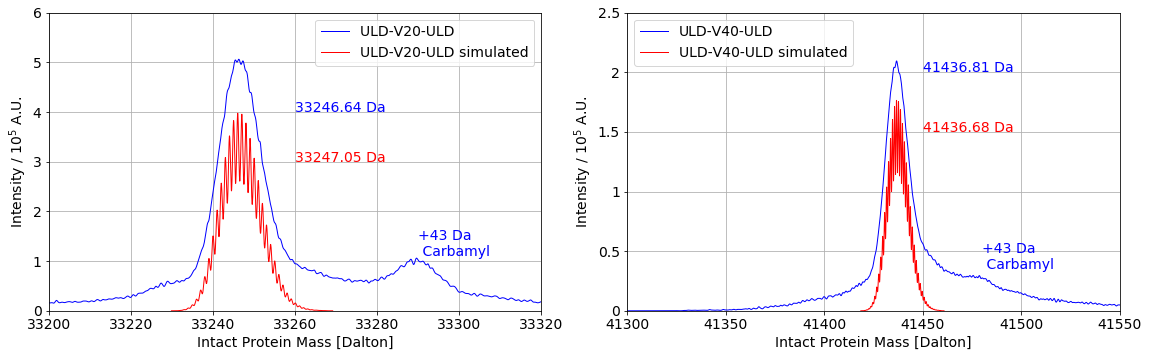

In [89]:
w_width = 120
w_init20 = 33200
w_init40 = 41300
w_width2 = 250

mpl.rcParams['font.size'] = 8
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['lines.markersize'] = 2
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['figure.titlesize'] = 'small'

mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

c1 = 'blue'
c2 = 'red'

f1 = plt.figure(figsize=(16,5))

ax1 = f1.add_subplot(1,2,1)

v20_real.plot(y='Intensity',x='m/z',ax=ax1, label = 'ULD-V20-ULD ', color = c1)
v20_sim.plot(y='Intensity',x='m/z',ax=ax1, label = 'ULD-V20-ULD simulated', color = c2)

ax1.set_xlim([w_init20, w_init20+w_width])
ax1.set_ylim([0,600000])
ax1.grid()
ax1.set_ylabel('Intensity / $10^5$ A.U.',fontsize=14)
ax1.set_xlabel('Intact Protein Mass [Dalton]',fontsize=14)
ax1.annotate('33247.05 Da',xy=(33260,300000),fontsize=14, color = c2 )
ax1.annotate('33246.64 Da',xy=(33260,400000),fontsize=14, color = c1)
ax1.annotate('+43 Da \n Carbamyl',xy=(33290,110000),fontsize=14, color = c1)
ax1.set_yticklabels([0, 1 , 2, 3,4,5, 6])


#============ 2nd subplot

ax2 = f1.add_subplot(1,2,2)

v40_real.plot(y='Intensity',x='m/z',ax=ax2, label = 'ULD-V40-ULD', color =c1)
v40_sim.plot(y='Intensity',x='m/z',ax=ax2, label = 'ULD-V40-ULD simulated', color = c2)

ax2.set_xlim([w_init40, w_init40+w_width2])
ax2.set_ylim([0,250000])
ax2.grid()
ax2.set_ylabel('Intensity / $10^5$ A.U.',fontsize=14)
ax2.set_xlabel('Intact Protein Mass [Dalton]',fontsize=14)
ax2.annotate('41436.68 Da',xy=(41450,150000),fontsize=14, color = c2 )
ax2.annotate('41436.81 Da',xy=(41450,200000),fontsize=14, color = c1)
ax2.annotate('+43 Da \n Carbamyl',xy=(41480,35000),fontsize=14, color = c1)
ax2.set_yticklabels([0, 0.5, 1 , 1.5, 2, 2.5])

plt.tight_layout()
#plt.suptitle('Simulated and real MS values for ULD-V20-ULD and ULD-V40-ULD', fontsize = 14)

f1.savefig('Images/MS.svg',format='svg',bbox_inches = 'tight')
f1.savefig('Images/MS.png',format='png',bbox_inches = 'tight')

In [50]:
mpl.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

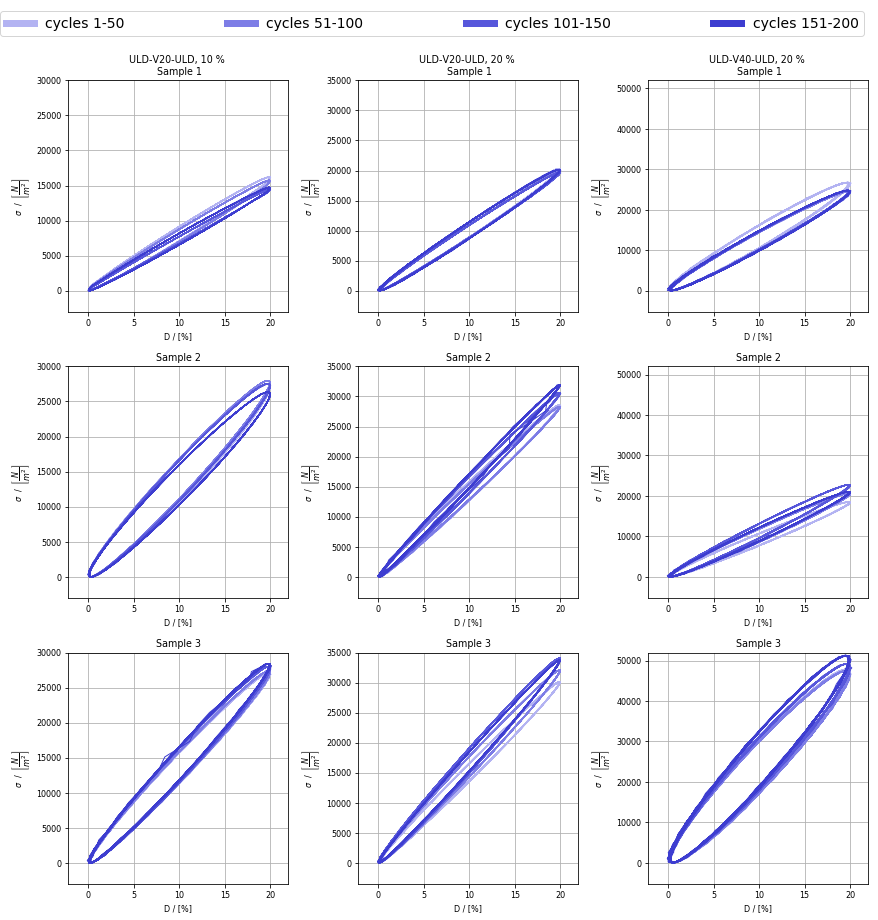

In [24]:
import copy

mpl.rcParams['font.size'] = 8
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['lines.markersize'] = 2
mpl.rcParams['legend.fontsize'] = 'small'
mpl.rcParams['figure.titlesize'] = 'small'

sigma_string = r'$\sigma$  /  $\left[\dfrac{N}{m^2}\right]$'

y_modulus = {}

fig = plt.figure(constrained_layout=True, figsize=(12,12))
spec = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
nc = 0
nr = 0


# Set scale_axes = True, if plot axes shoudl be scaled to same maximum value fgür each gel type
scale_axes = True
ylims = {'0':30000,'1':35000,'2':52000}
xlims = 22



#iterate through columns
for key in data_cyc.keys():
    if nr == 3:
        nc +=1
        nr = 0
 
    ax = fig.add_subplot(spec[nr,nc])
    d = data_cyc[key]
    
    # get geometric data of gels for sigma and epsilon
    
    h_gel_mm = dimensions_mm[key][0] 
    b_gel_mm = dimensions_mm[key][1]
    l_gel_mm = dimensions_mm[key][2]
    
    #plot 4 curves, each consisting of 2000 points, to investigate fatigue
    for k in range(1,5):
       
        dtot = data_cyc[key].iloc[(k-1)*2000:k*2000].copy()
        mask = np.ones((dtot.shape[0]))
        mask[0:50] = 0
        mask[-49:] = 0

        mask[51:-50] = 0

        dtot['Ff'] = filter_fourier(dtot.F, mask)
        dtot['Ff'] = dtot['Ff'] - np.min(dtot['Ff'])
        dtot['Eps'] = 100 * (dtot.D / l_gel_mm)
        dtot['Sigma'] = 1e6 * (dtot.Ff / (h_gel_mm*b_gel_mm))
        
        dtot.plot(x='Eps',y='Sigma', ax = ax, color = (.7**k, .7**k, .95**k), label = 'cycles '  + str(int((k-1)*2000/40+1))+ '-' +str(int(k*2000/40)))
        
        #i = 1
        #if i == 1:
        #    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)
        #i+=1
        
        df = np.max(dtot['Ff']) - np.min(dtot['Ff'])
        dsigma = df/(b_gel_mm*h_gel_mm)
        
        epsilon = (np.max(dtot['D']) - np.min(dtot['D']))/l_gel_mm
        #save the youngs modulus for each cycle group
        y_modulus[key+'_'+str(k)] = 1e6*dsigma/epsilon
        
        # remove legends from all subplots
        ax.get_legend().remove()
        
   # ax.set_ylim([-0.01,0.10])
    ax.set_title(titles[key])
    ax.set_xlabel('D / [%]')
    ax.set_ylabel(sigma_string)
    
   
    
#get handels and labels for the last axes to create a single legend above all subplots
handles, labels = ax.get_legend_handles_labels()
# copy the handles

handles = [copy.copy(ha) for ha in handles]

# set the linewidths to the copies
[ha.set_linewidth(7) for ha in handles]

fig.legend(handles, 
           labels, 
           ncol=4, 
           borderaxespad=0., 
           fontsize = 14,
           mode="expand",
           #loc='upper center', 
           bbox_to_anchor=(0., .95, 1., .102))


#fig.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)

#plt.tight_layout()
    
nc = 0    

fig.savefig('Images/Spectrum.svg',format='svg',bbox_inches = 'tight')
fig.savefig('Images/Spectrum.png',format='png',bbox_inches = 'tight')


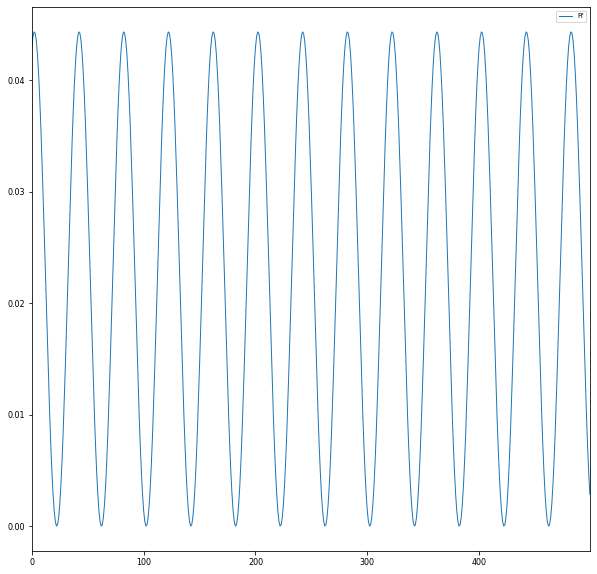